##Gadgets-RECOMMENDATION-SYSTEM
A NLP project on Gadgets Recommendation System using Cosine Similarity. The CSV fle (1925 x 9) is the Dataset.

FUTURE SCOPE : To Deploy in a website. It can be done using Flask Library. By integrating with Front end, the user is more convenient with the GUI and Recommendation System. The Dataset can be deployed in a Backend Database to increase the No.of devices and provide accurate recommendations.

In [ ]:
import nltk
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [ ]:
df=pd.read_csv('/content/sample_data/Devices_configuration.csv')
df.head()

,Company,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,OS
0,Acer,Aspire 3,Laptop,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Linux
1,Acer,Aspire A515-51G,Laptop,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Windows
2,Acer,Aspire A515-51G,Laptop,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Windows
3,Acer,Aspire 3,Laptop,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,1TB HDD,Windows
4,Acer,Aspire E5-475,Laptop,14.0,1366x768,Intel Core i3 6006U 2GHz,8GB,1TB HDD,Windows


In [ ]:
#Get summary statistics
print(df.describe())

       Screen Size
count  1924.000000
mean     10.786279
std       4.756282
min       2.450000
25%       5.500000
50%      12.900000
75%      15.600000
max      18.400000


In [ ]:
#Check for missing values
print(df.isnull().sum())

Company        0
Model Name     0
Category       0
Screen Size    0
Screen         0
CPU            0
RAM            0
Storage        0
OS             0
dtype: int64


## Exploratory Data Analysis

In [ ]:
#Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

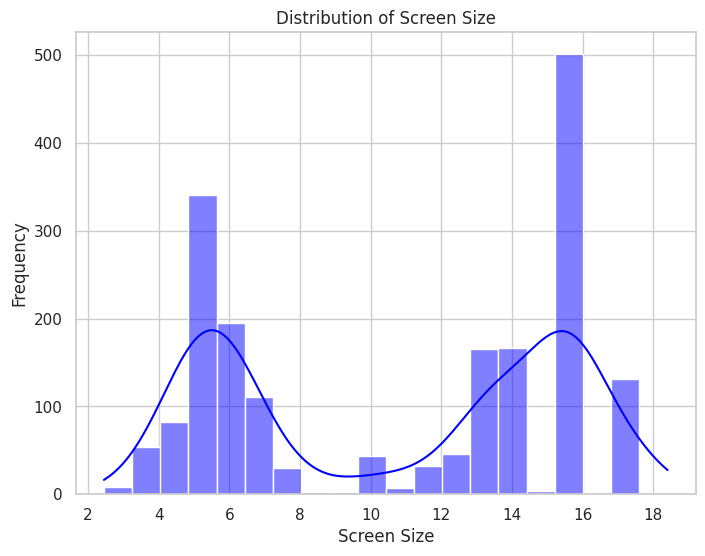

In [ ]:
# Plot distributions
for column in df.columns:
    if df[column].dtype != 'object':  # Plot only numerical columns
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, bins=20, color='blue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
print(df.columns)
col = ['Company', 'Category', 'RAM', 'OS', 'Storage']

Index(['Company', 'Model Name', 'Category', 'Screen Size', 'Screen', 'CPU',
       'RAM', 'Storage', 'OS'],
      dtype='object')


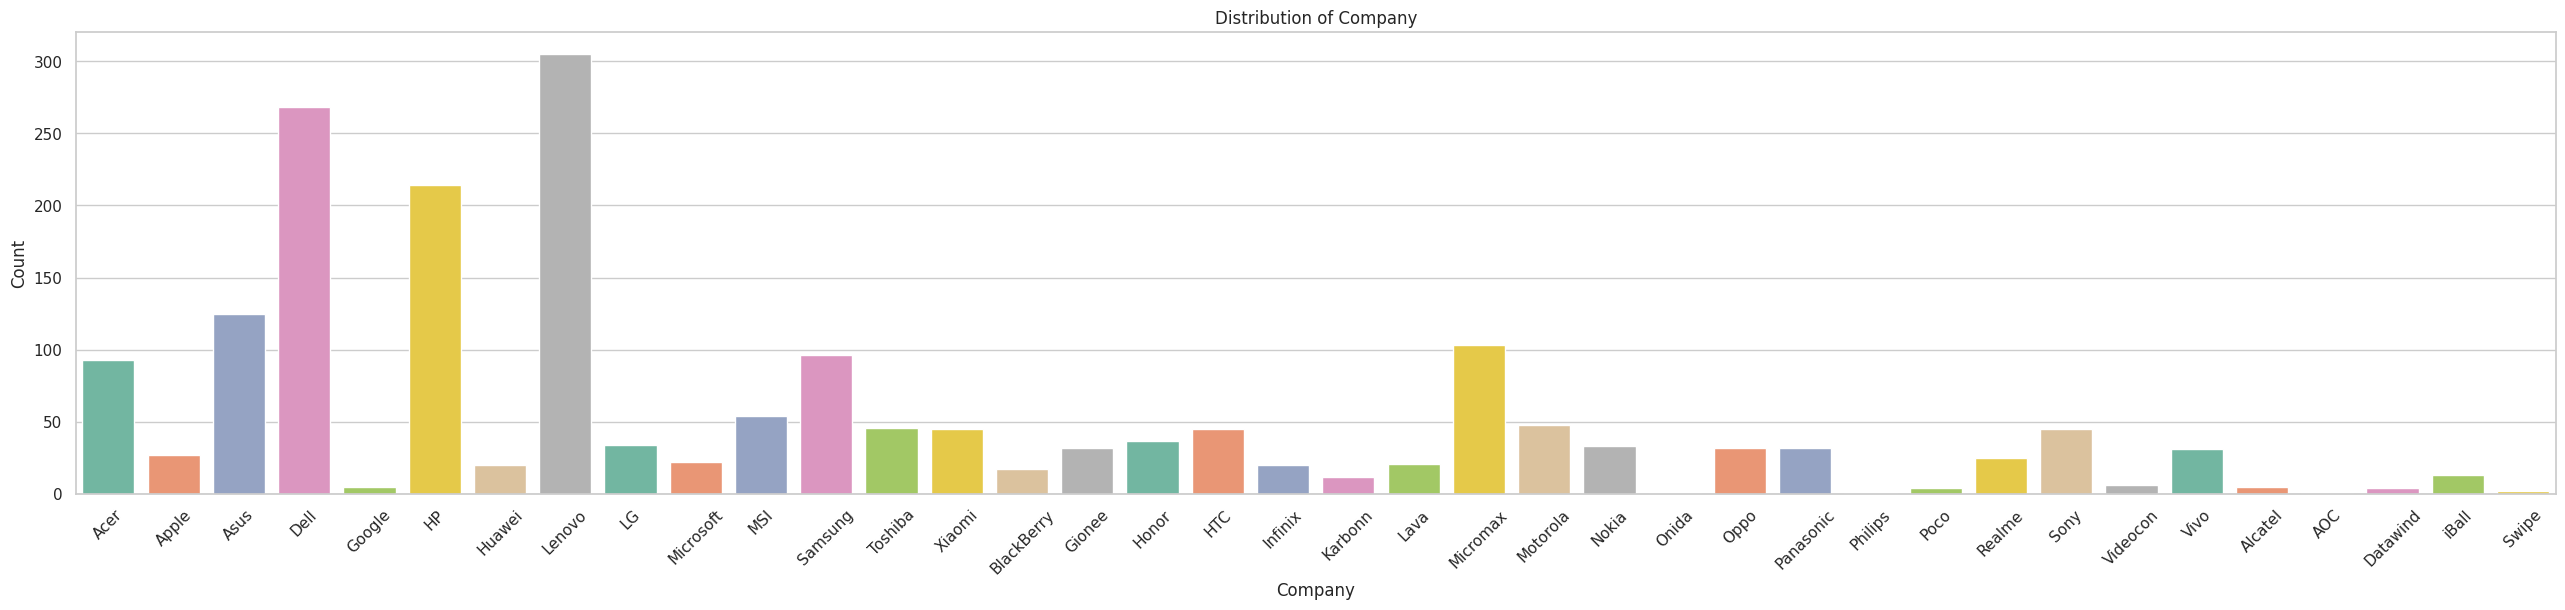

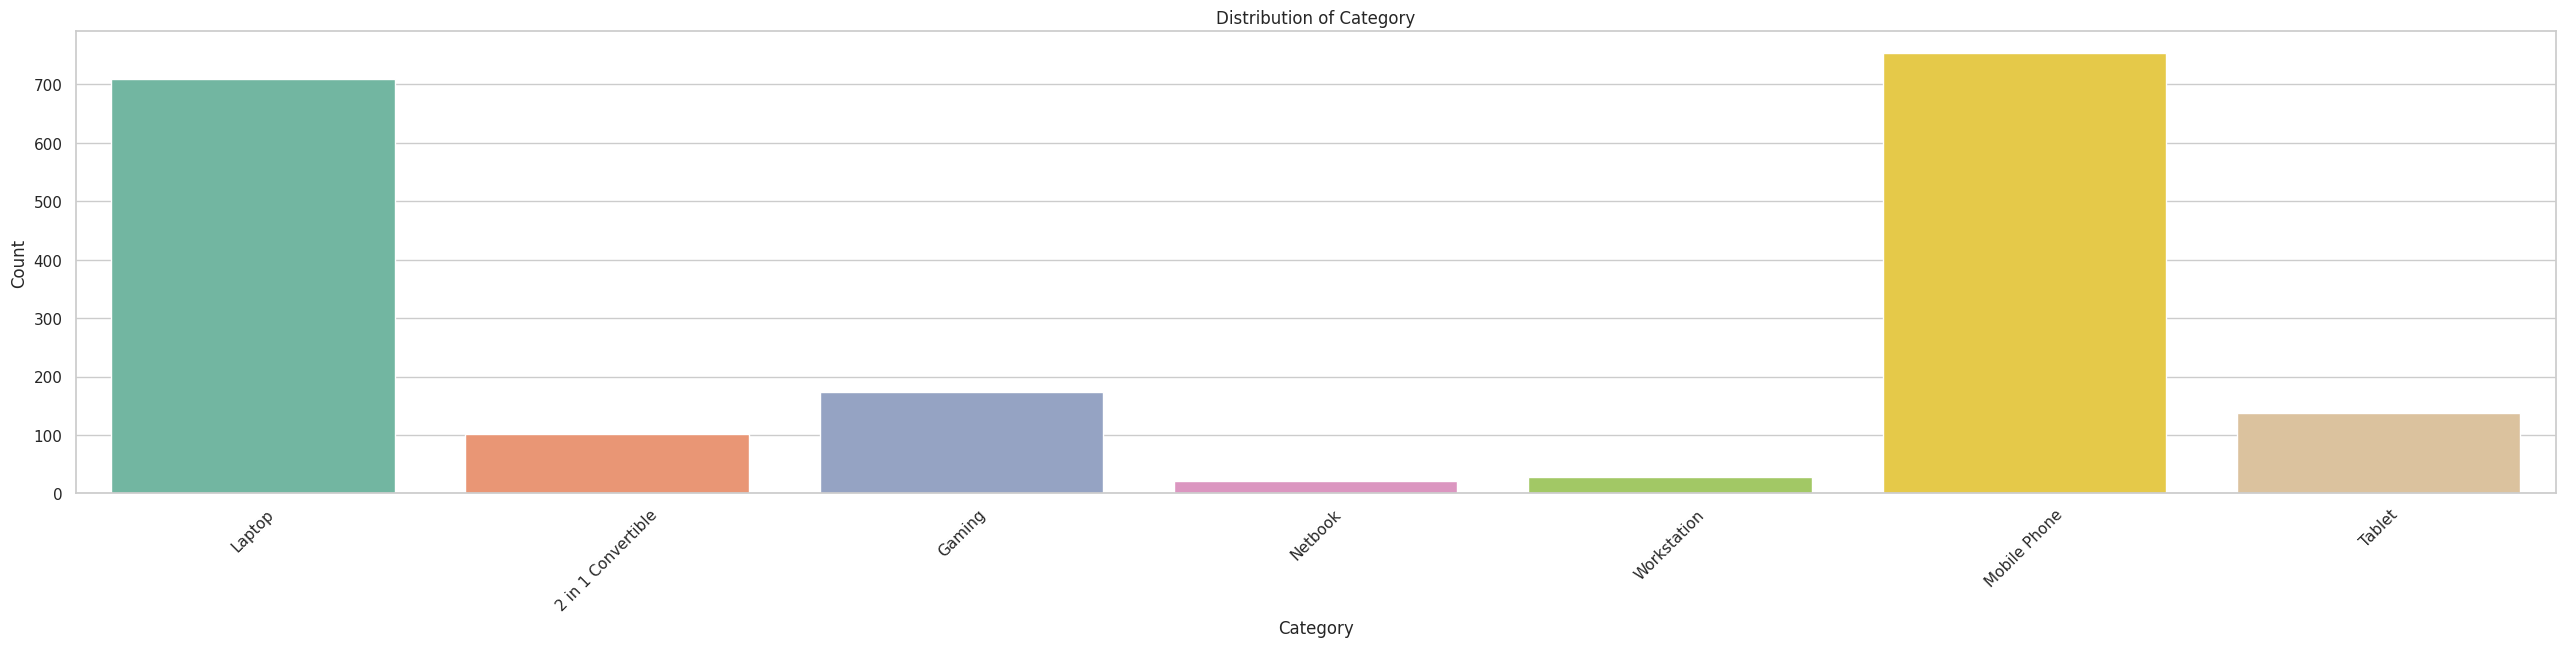

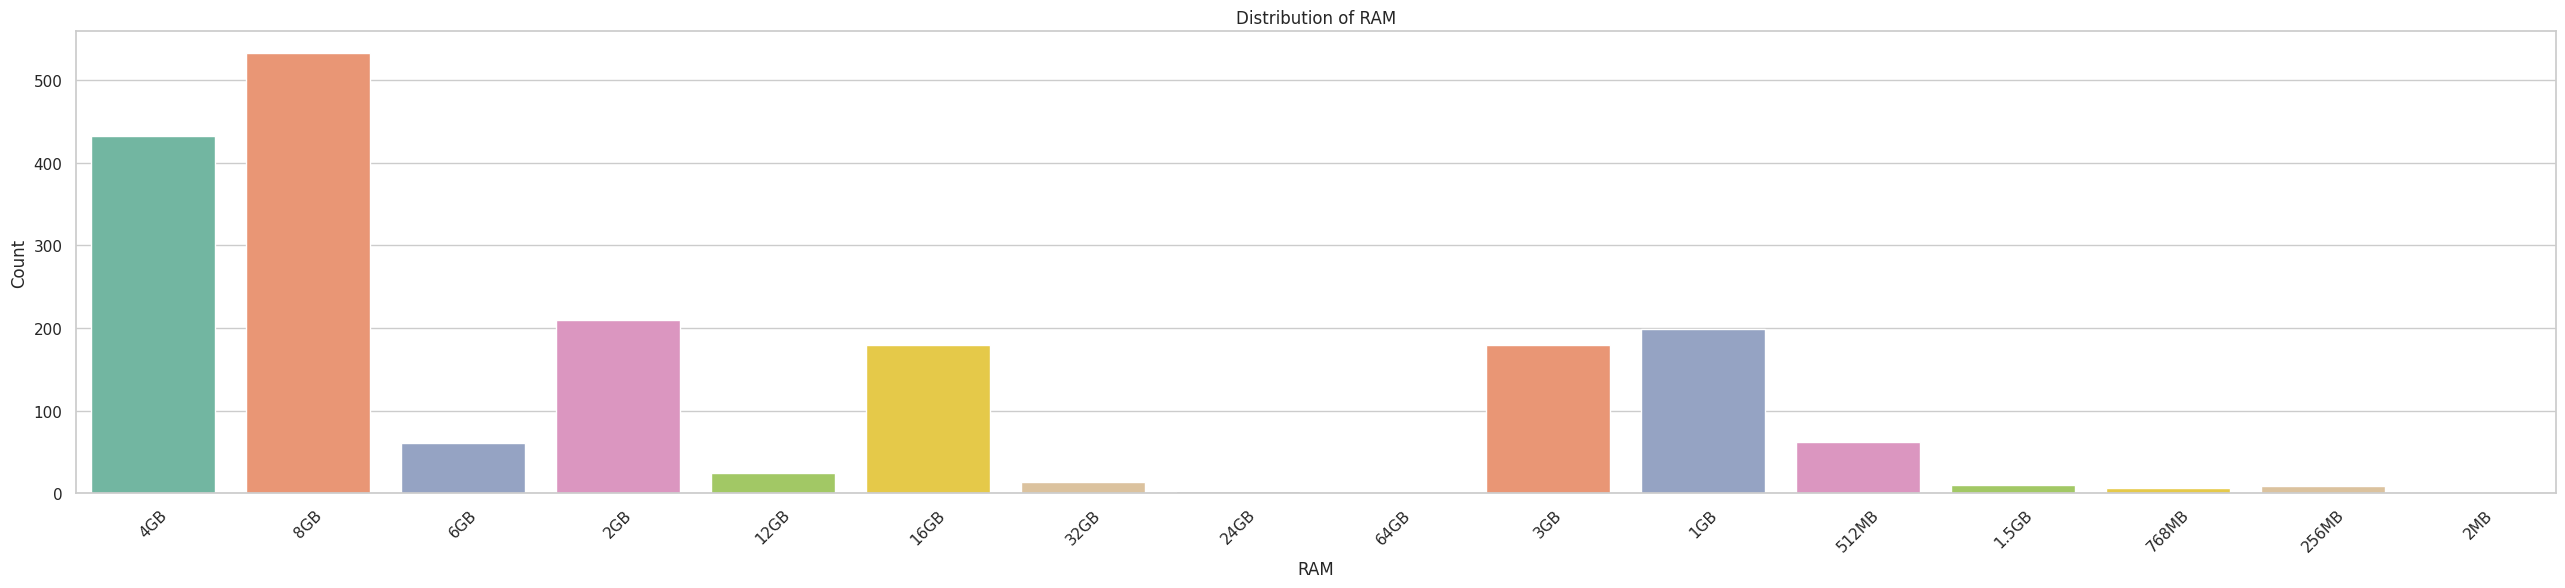

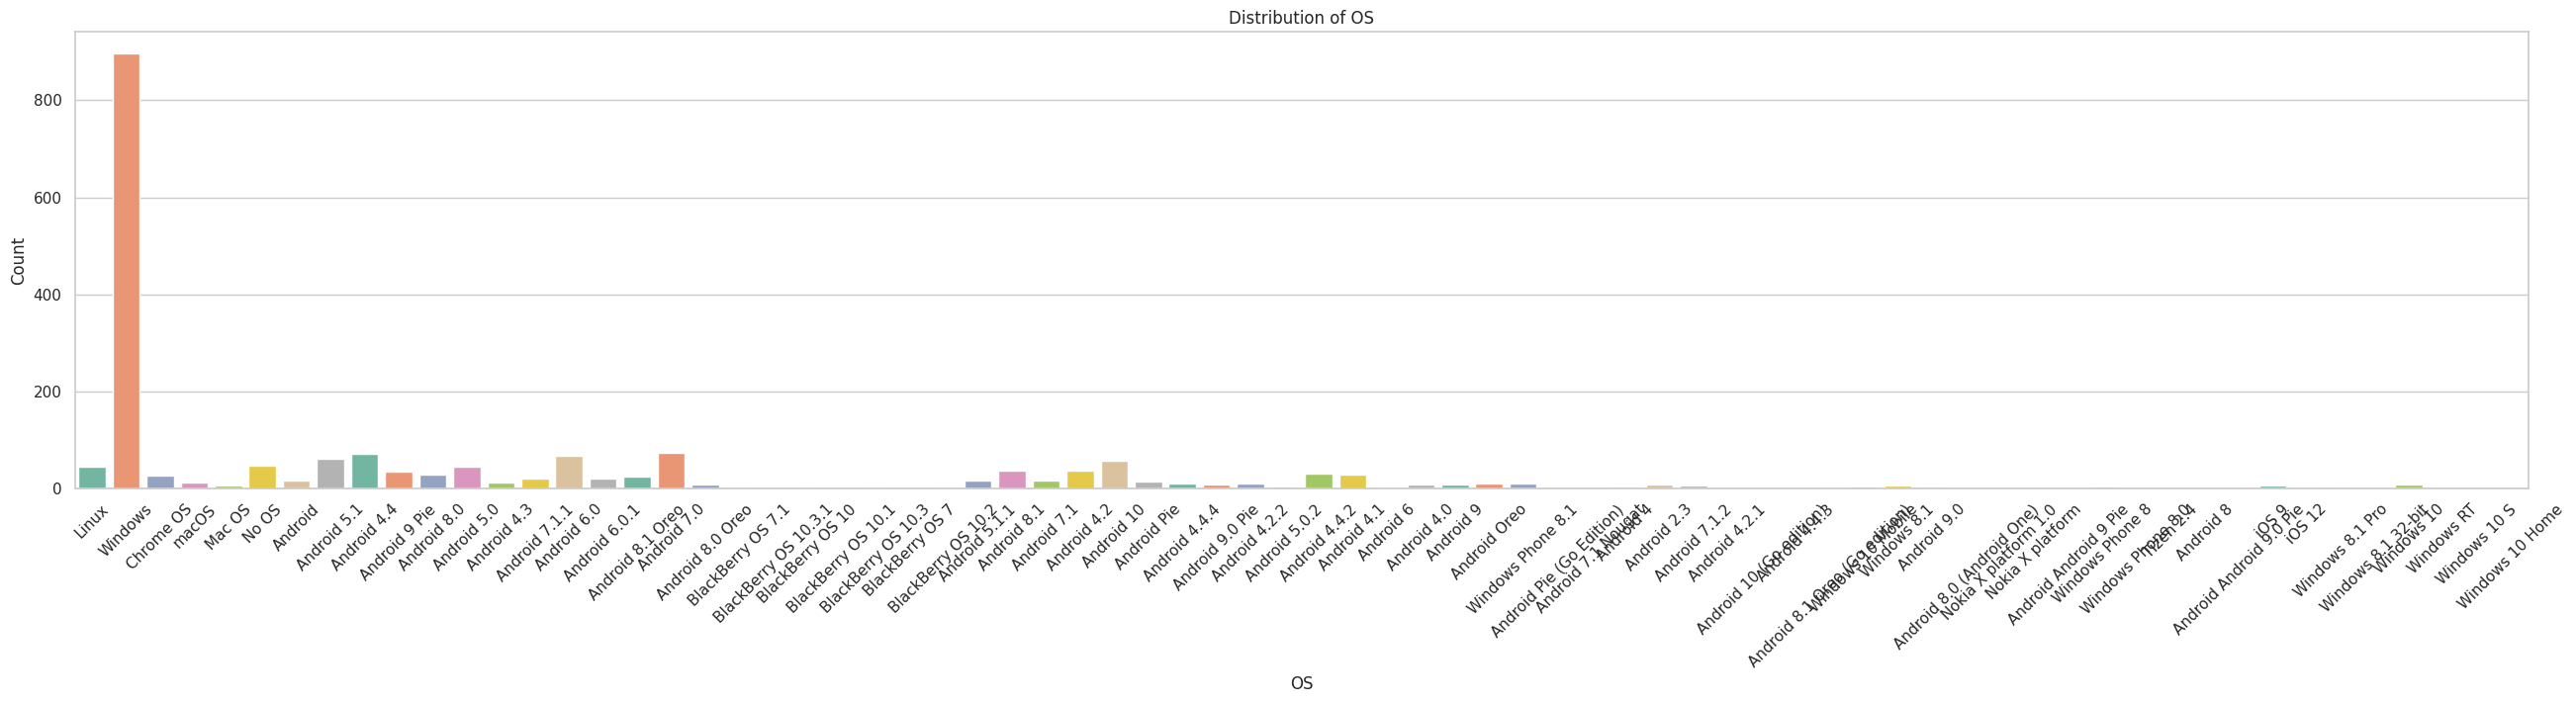

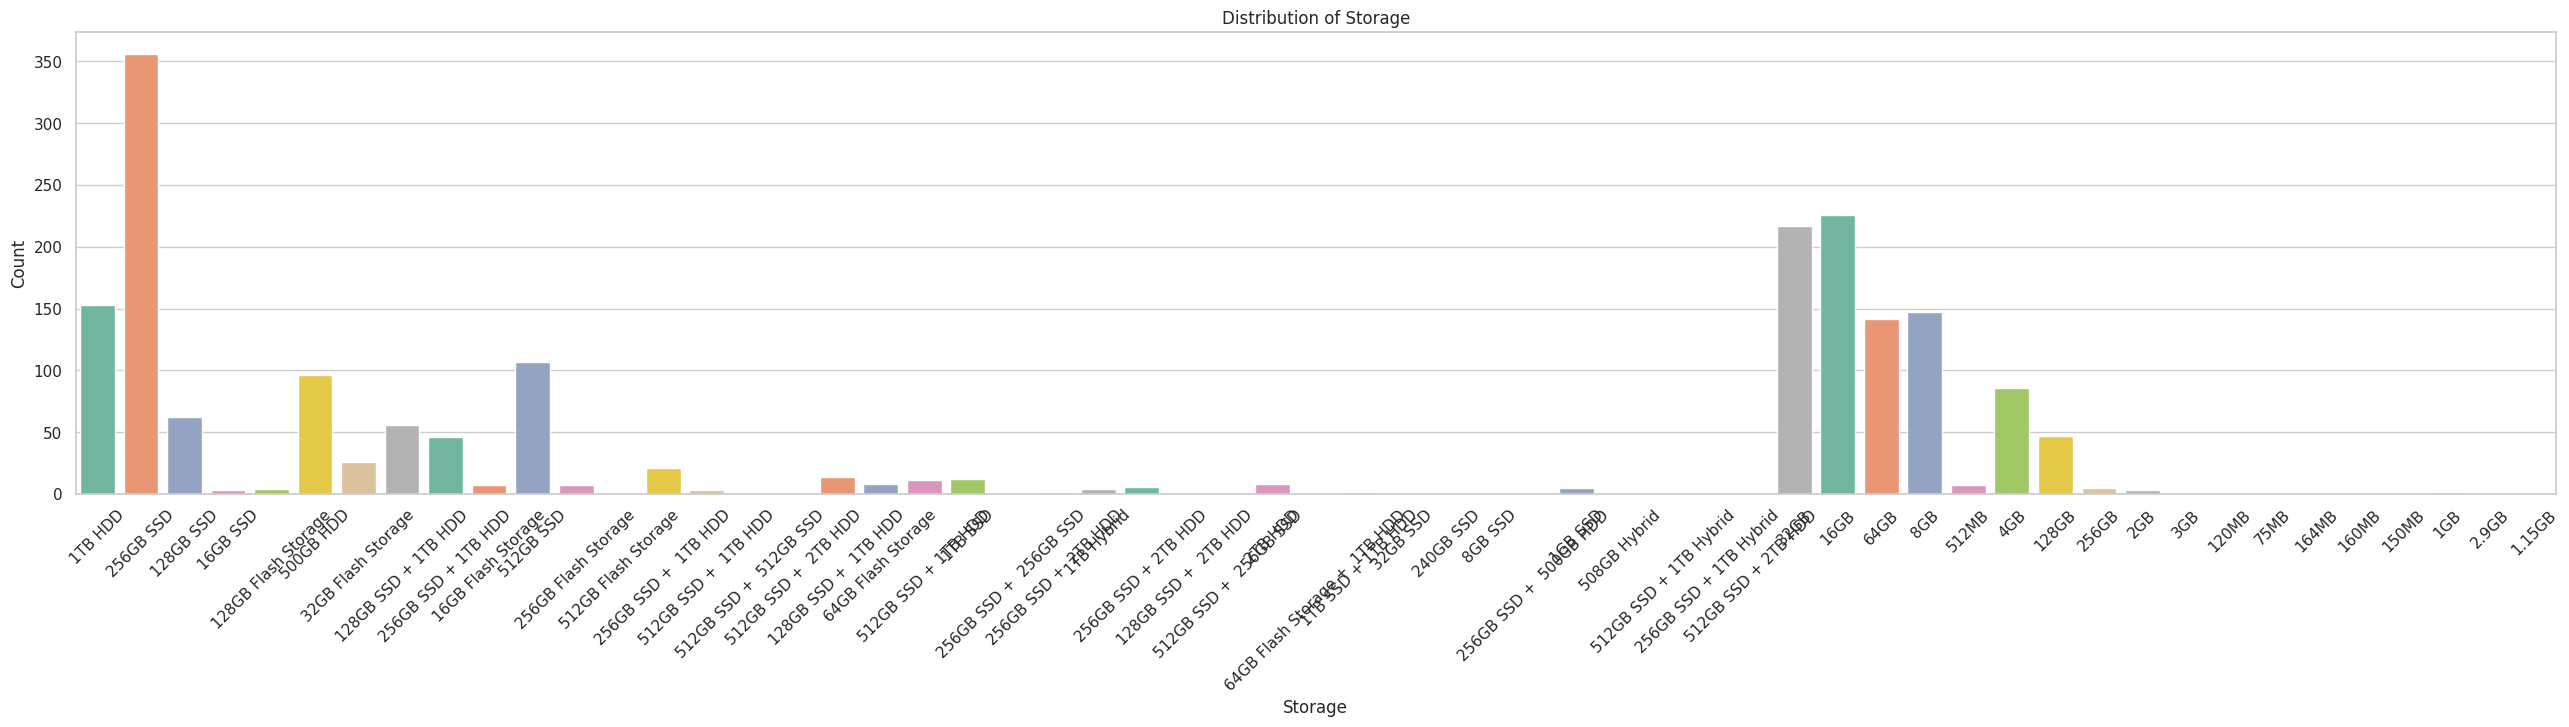

In [ ]:
# Visualize Categorical Variables
for column in col:
    if df[column].dtype == 'object':  # Plot only categorical columns
        plt.figure(figsize=(32, 6))
        sns.countplot(x=column, data=df, palette='Set2')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

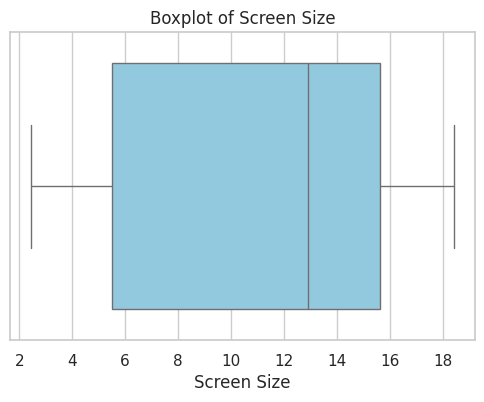

In [ ]:
# Boxplots
for column in df.columns:
    if df[column].dtype != 'object':  # Plot only numerical columns
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[column], color='skyblue')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

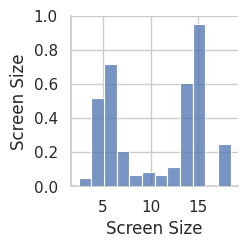

In [ ]:
# Pairplot
# Note: Pairplot can be computationally expensive for large datasets
if len(df.columns) <= 10:
    sns.pairplot(df)
    plt.show()

In [ ]:
print('Rows x Columns : ', df.shape[0], 'x', df.shape[1])
print('Features: ', df.columns.tolist())
print('\nUnique values:')
print(df.nunique())

Rows x Columns :  1924 x 9
Features:  ['Company', 'Model Name', 'Category', 'Screen Size', 'Screen', 'CPU', 'RAM', 'Storage', 'OS']

Unique values:
Company          38
Model Name     1295
Category          7
Screen Size     100
Screen          110
CPU             369
RAM              16
Storage          57
OS               72
dtype: int64


In [ ]:
df = df[['Company','Model Name','Category','CPU','Storage','OS']]
df

,Company,Model Name,Category,CPU,Storage,OS
0,Acer,Aspire 3,Laptop,Intel Core i3 7130U 2.7GHz,1TB HDD,Linux
1,Acer,Aspire A515-51G,Laptop,Intel Core i5 8250U 1.6GHz,256GB SSD,Windows
2,Acer,Aspire A515-51G,Laptop,Intel Core i7 8550U 1.8GHz,256GB SSD,Windows
3,Acer,Aspire 3,Laptop,Intel Core i3 7100U 2.4GHz,1TB HDD,Windows
4,Acer,Aspire E5-475,Laptop,Intel Core i3 6006U 2GHz,1TB HDD,Windows
...,...,...,...,...,...,...
1919,Samsung,Samsung Galaxy Tab S5e Tablet,Tablet,Qualcomm Snapdragon 670,64GB,Android 9.0
1920,Samsung,Samsung Galaxy Tab S4 SM-T830 Tablet,Tablet,Qualcomm Snapdragon 835,64GB,Android 8.1
1921,Samsung,Samsung Galaxy Tab A 10.1,Tablet,Exynos 7904,32GB,Android 9.0
1922,Swipe,Swipe Slice Tablet,Tablet,MediaTek MT8312,4GB,Android 4.2.2


## Preprocessing using NLP

A List is formed by pre-processing such as extracting Stop words, removing all the Punctuations, Blank spaces, and concatenating them to form a Bag of Words.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['Company'] = df['Company'].map(lambda x: x.split(' '))
df['Category'] = df['Category'].map(lambda x: x.split(' '))
df['CPU'] = df['CPU'].map(lambda x: x.split(' ')[:3])
df['Storage'] = df['Storage'].map(lambda x: x.split(' ')[:3])
df['OS'] = df['OS'].map(lambda x: x.split(' '))

for index, row in df.iterrows():
    row['Company'] = [x.lower().replace(' ','') for x in row['Company']]
    row['Category'] = [x.lower().replace(' ','') for x in row['Category']]
    row['CPU'] = [x.lower().replace(' ','') for x in row['CPU']]
    row['Storage'] = [x.lower().replace(' ','') for x in row['Storage']]
    row['OS'] = [x.lower().replace(' ','') for x in row['OS']]
df

,Company,Model Name,Category,CPU,Storage,OS
0,[Acer],Aspire 3,[Laptop],"[Intel, Core, i3]","[1TB, HDD]",[Linux]
1,[Acer],Aspire A515-51G,[Laptop],"[Intel, Core, i5]","[256GB, SSD]",[Windows]
2,[Acer],Aspire A515-51G,[Laptop],"[Intel, Core, i7]","[256GB, SSD]",[Windows]
3,[Acer],Aspire 3,[Laptop],"[Intel, Core, i3]","[1TB, HDD]",[Windows]
4,[Acer],Aspire E5-475,[Laptop],"[Intel, Core, i3]","[1TB, HDD]",[Windows]
...,...,...,...,...,...,...
1919,[Samsung],Samsung Galaxy Tab S5e Tablet,[Tablet],"[Qualcomm, Snapdragon, 670]",[64GB],"[Android, 9.0]"
1920,[Samsung],Samsung Galaxy Tab S4 SM-T830 Tablet,[Tablet],"[Qualcomm, Snapdragon, 835]",[64GB],"[Android, 8.1]"
1921,[Samsung],Samsung Galaxy Tab A 10.1,[Tablet],"[Exynos, 7904]",[32GB],"[Android, 9.0]"
1922,[Swipe],Swipe Slice Tablet,[Tablet],"[MediaTek, MT8312]",[4GB],"[Android, 4.2.2]"


In [ ]:
print(df.columns.tolist())

['Company', 'Model Name', 'Category', 'CPU', 'Storage', 'OS']


In [ ]:
df['Bag_of_words']=''
columns=['Company', 'Category', 'CPU', 'Storage', 'OS']
print(columns)
for index, row in df.iterrows():
    words=''
    for col in columns:
        words+= ' '.join(row[col])+ ' '
    # row['Bag_of_words']=words
    df.at[index, 'Bag_of_words'] = words
    # print(row['Bag_of_words'])

['Company', 'Category', 'CPU', 'Storage', 'OS']


In [ ]:
df['Bag_of_words']

0                Acer Laptop Intel Core i3 1TB HDD Linux 
1            Acer Laptop Intel Core i5 256GB SSD Windows 
2            Acer Laptop Intel Core i7 256GB SSD Windows 
3              Acer Laptop Intel Core i3 1TB HDD Windows 
4              Acer Laptop Intel Core i3 1TB HDD Windows 
                              ...                        
1919    Samsung Tablet Qualcomm Snapdragon 670 64GB An...
1920    Samsung Tablet Qualcomm Snapdragon 835 64GB An...
1921         Samsung Tablet Exynos 7904 32GB Android 9.0 
1922      Swipe Tablet MediaTek MT8312 4GB Android 4.2.2 
1923     Swipe Tablet Intel Atom Z3735D 32GB Windows 8.1 
Name: Bag_of_words, Length: 1924, dtype: object

In [ ]:
count=CountVectorizer()
count_matrix=count.fit_transform(df['Bag_of_words'])
count_matrix

<1924x377 sparse matrix of type '<class 'numpy.int64'>'
	with 15355 stored elements in Compressed Sparse Row format>

## Compute Cosine similarity and extract devices with similar configuration

Create a matrix with all the vectors. Calculate the cosine similarity of the matrix. Once the user gives Model Name as the input, calculate the Score, refer to the Similarity Matrix, and extract the devices which have the Similar Configuration.

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.5        0.5        ... 0.         0.         0.13363062]
 [0.5        1.         0.875      ... 0.         0.         0.26726124]
 [0.5        0.875      1.         ... 0.         0.         0.26726124]
 ...
 [0.         0.         0.         ... 1.         0.33333333 0.3086067 ]
 [0.         0.         0.         ... 0.33333333 1.         0.3086067 ]
 [0.13363062 0.26726124 0.26726124 ... 0.3086067  0.3086067  1.        ]]


In [ ]:
indices = pd.Series(df['Model Name'])
indices[:5]

0           Aspire 3
1    Aspire A515-51G
2    Aspire A515-51G
3           Aspire 3
4      Aspire E5-475
Name: Model Name, dtype: object

## Recommend Gadgets to user

 The top 15 devices are sorted and displayed to the user.

In [ ]:
def recommend(title,cosine_sim = cosine_sim):
    recommended_devices=[]
    idx=indices[indices == title].index[0]
    score_series=pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_15_indices=list(score_series.iloc[1:16].index)
    for i in top_15_indices:
        recommended_devices.append(list(df['Model Name'])[i])
    print("Below are the top 15 recommended devices as per your search\n")
    return recommended_devices

In [ ]:
recommend('XPS 13')

Below are the top 15 recommended devices as per your search



['Latitude 5480',
 'XPS 13',
 'Inspiron 5770',
 'XPS 13',
 'Inspiron 5770',
 'Inspiron 7570',
 'Inspiron 5570',
 'XPS 13',
 'Vostro 5568',
 'Latitude 3580',
 'Vostro 3568',
 'ThinkPad 13',
 'Tecra Z40-C-12X',
 'Inspiron 5567',
 'Latitude E7270']

In [ ]:
recommend('Latitude 5480')

Below are the top 15 recommended devices as per your search



['Latitude 5480',
 'Vostro 5568',
 'Inspiron 5570',
 'Inspiron 3576',
 'Inspiron 3567',
 'Inspiron 5567',
 'Inspiron 7570',
 'XPS 13',
 'Latitude 5580',
 'Aspire 7',
 'Inspiron 5567',
 'Latitude 5480',
 'Latitude 7280',
 'Inspiron 5570',
 'XPS 13']

In [ ]:
recommend('Aspire 3')

Below are the top 15 recommended devices as per your search



['Aspire A315-51',
 'Aspire 5',
 'Aspire E5-576G',
 'Inspiron 3567',
 'Aspire E5-575',
 'Vostro 3568',
 'Vostro 3568',
 'Aspire E5-774G',
 'E5 774G',
 'Aspire ES1-572',
 'Inspiron 3567',
 'Aspire A315-51',
 'Aspire 7',
 'Aspire A515-51G-32MX',
 'Spin 3']